# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url =  "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
 # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | mana
Processing Record 4 of Set 1 | vila franca do campo
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | kachkanar
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | whistler
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | perry
Processing Record 14 of Set 1 | dogubayazit
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | svetlyy
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | sainte-suzanne
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | lahad datu
Processing Record 22 of Set 1 | thunder bay
Pr

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,292.86,66,30,4.01,PN,1721021895
1,ushuaia,-54.8000,-68.3000,274.96,87,0,1.03,AR,1721021897
2,mana,5.6592,-53.7767,296.92,94,88,2.09,GF,1721021898
3,vila franca do campo,37.7167,-25.4333,294.38,99,15,1.90,PT,1721021899
4,avarua,-21.2078,-159.7750,295.18,64,40,3.60,CK,1721021900


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

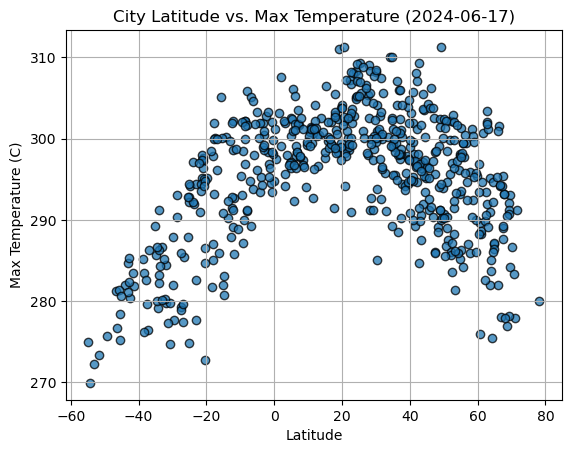

In [85]:
# Build scatter plot for latitude vs. temperature
 
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], 
            edgecolor='black', linewidth=1, alpha=0.75, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

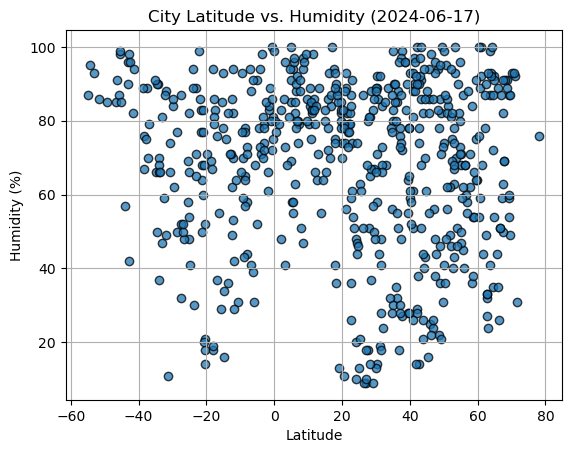

In [86]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], 
            edgecolor='black', linewidth=1, alpha=0.75, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

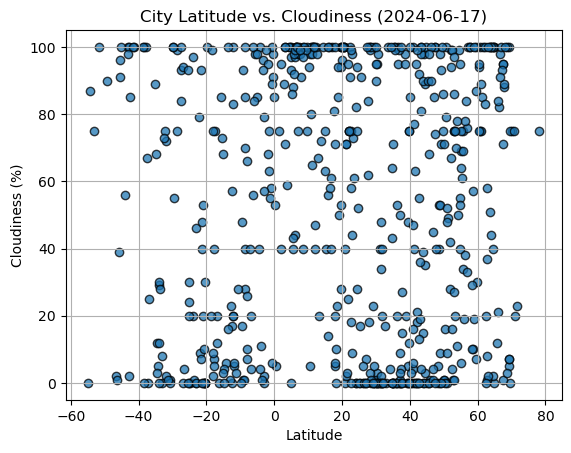

In [87]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], 
            edgecolor='black', linewidth=1, alpha=0.75, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

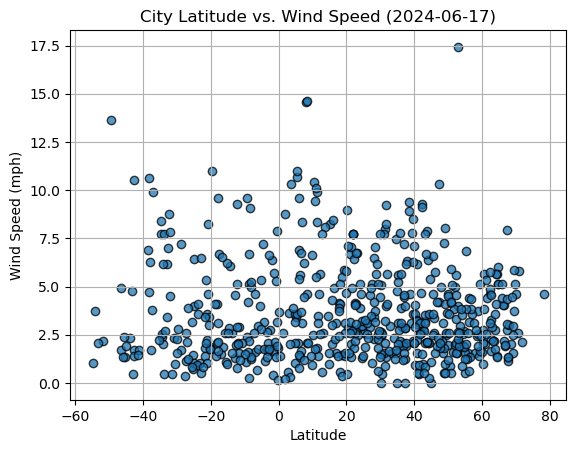

In [88]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], 
            edgecolor='black', linewidth=1, alpha=0.75, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    


   

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,mana,5.6592,-53.7767,296.92,94,88,2.09,GF,1721021898
3,vila franca do campo,37.7167,-25.4333,294.38,99,15,1.90,PT,1721021899
6,kachkanar,58.7000,59.4948,292.42,54,10,3.72,RU,1721021903
7,qaqortoq,60.7167,-46.0333,275.94,89,100,3.83,GL,1721021904
8,whistler,50.1164,-122.9695,290.68,74,1,1.99,CA,1721021906


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,292.86,66,30,4.01,PN,1721021895
1,ushuaia,-54.8000,-68.3000,274.96,87,0,1.03,AR,1721021897
4,avarua,-21.2078,-159.7750,295.18,64,40,3.60,CK,1721021900
5,grytviken,-54.2811,-36.5092,269.94,95,87,3.73,GS,1721021902
10,lebu,-37.6167,-73.6500,279.70,89,67,1.69,CL,1721021908


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.2843235304174628


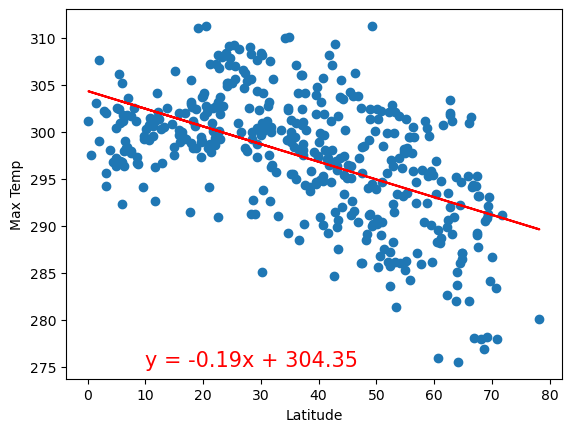

In [92]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(10,275))


The r-value is: 0.5910098123755411


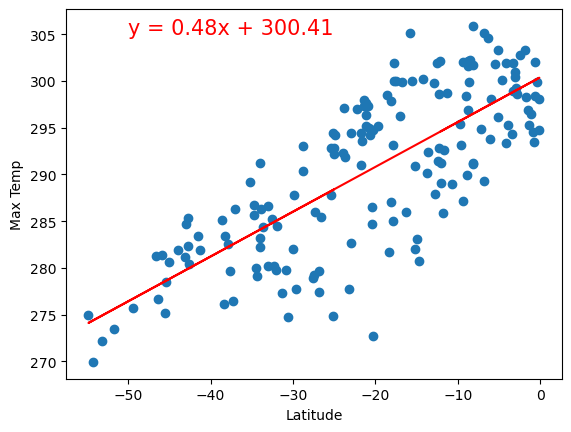

In [93]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-50,305))

**Discussion about the linear relationship:** The higher r-value (0.5910) in the Southern Hemisphere indicates a stronger linear relationship between latitude and maximum temperature compared to the Northern Hemisphere (0.2843). This difference suggests that latitude has a more pronounced effect on maximum temperatures in the Southern Hemisphere.In conclusion, these linear regression analyses provide insights into how maximum temperatures vary with latitude in both hemispheres. The r-values help quantify the degree of correlation, highlighting that while there is a relationship between latitude and maximum temperature in both hemispheres, the Southern Hemisphere shows a stronger linear association between these variables

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.011198866963567896


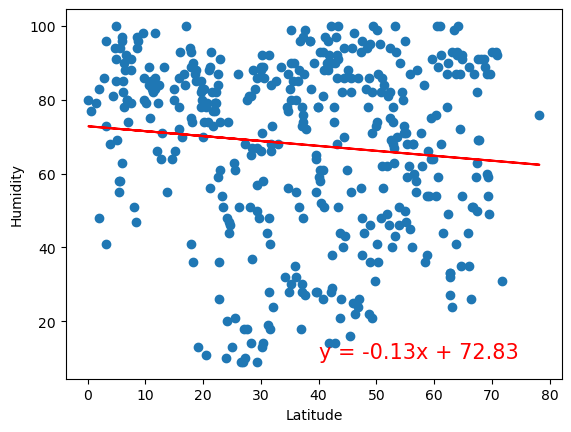

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.015695120476919837


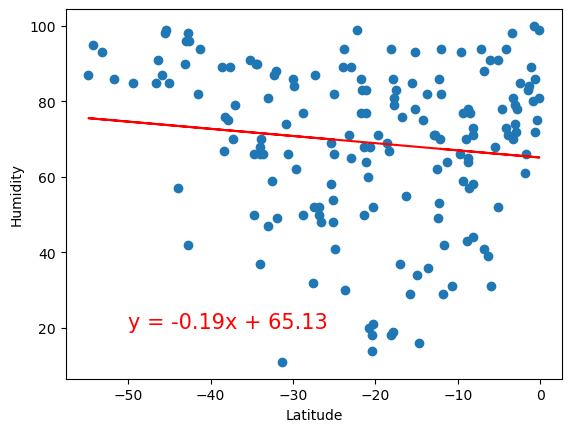

In [95]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-50,20))

**Discussion about the linear relationship:** Both analyses indicate that latitude does not explain variations in humidity levels in either hemisphere. The weak r-values suggest that other factors, such as local geography, climate systems, or seasonal variations, likely have a stronger influence on humidity levels than latitude alone.
In conclusion, while latitude might affect other meteorological factors like temperature, its impact on humidity appears negligible based on these analyses. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013779612122880125


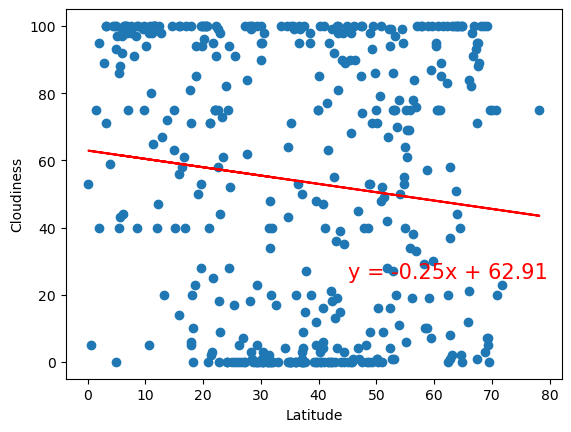

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(45,25))

The r-value is: 0.0015162629652874563


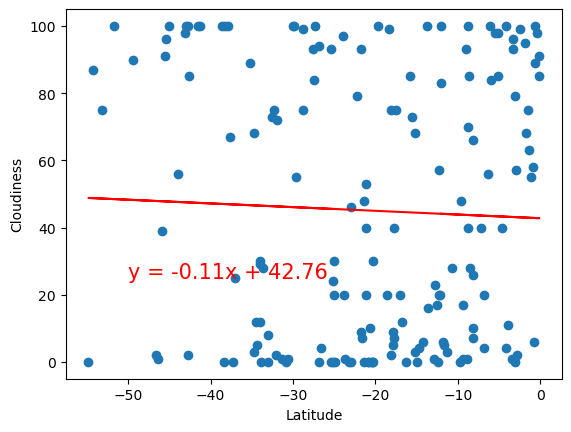

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-50,25))

**Discussion about the linear relationship:** Both analyses indicate that latitude does not explain variations in cloudiness levels in either hemisphere. The weak r-values suggest that other factors, such as local weather patterns, geography, or seasonal changes, likely have a stronger influence on cloudiness levels than latitude alone.
In conclusion, these analyses suggest that latitude alone is not a significant factor in determining cloudiness levels in either the Northern or Southern Hemisphere based on the provided data. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02282578259981803


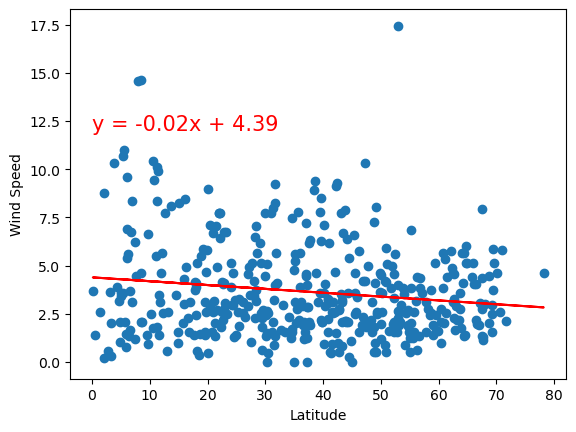

In [98]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(0,12))

The r-value is: 0.010510423472384678


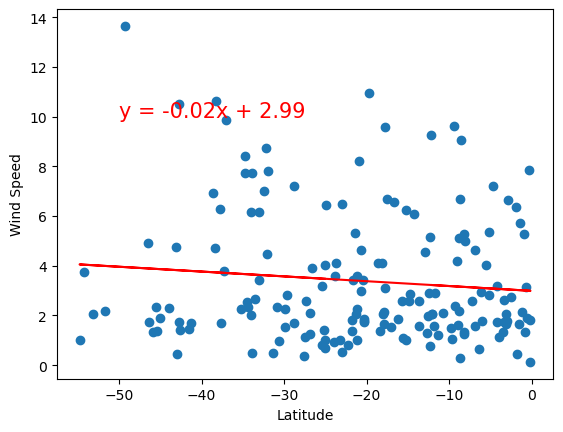

In [99]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-50,10))

**Discussion about the linear relationship:** Both analyses suggest that latitude alone is not a significant factor in determining wind speed levels in either hemisphere. The weak r-values suggest that other factors, such as local weather patterns, geography, or seasonal changes, likely have a stronger influence on wind speed levels than latitude alone.
In conclusion, based on the provided data, latitude does not appear to explain variations in wind speed levels in either the Northern or Southern Hemisphere. 